# Regression

In this notebook, we present the metrics that can be used in regression.

A set of metrics are dedicated to regression. Indeed, classification metrics
cannot be used to evaluate the generalization performance of regression models
because there is a fundamental difference between their target type `target`:
it is a continuous variable in regression, while a discrete variable in
classification.

We use the Ames housing dataset. The goal is to predict the price of houses in
the city of Ames, Iowa. As with classification, we only use a single
train-test split to focus solely on the regression metrics.

In [1]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("../datasets/house_prices.csv")
data = ames_housing.drop(columns="SalePrice")
target = ames_housing["SalePrice"]
data = data.select_dtypes(np.number)
target /= 1000

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Let's start by splitting our dataset intro a train and test set.

In [2]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0
)

Some machine learning models are designed to be solved as an optimization
problem: minimizing an error (also known as the loss function) using a
training set. A basic loss function used in regression is the mean squared
error (MSE). Thus, this metric is sometimes used to evaluate the model since
it is optimized by said model.

We give an example using a linear regression model.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_train)

print(
    "Mean squared error on the training set: "
    f"{mean_squared_error(target_train, target_predicted):.3f}"
)

Mean squared error on the training set: 996.902


Our linear regression model is minimizing the mean squared error on the
training set. It means that there is no other set of coefficients which
decreases the error.

Then, we can compute the mean squared error on the test set.

In [4]:
target_predicted = regressor.predict(data_test)

print(
    "Mean squared error on the testing set: "
    f"{mean_squared_error(target_test, target_predicted):.3f}"
)

Mean squared error on the testing set: 2064.736


The raw MSE can be difficult to interpret. One way is to rescale the MSE by
the variance of the target. This score is known as the $R^2$ also called the
[coefficient of
determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).
Indeed, this is the default score used in scikit-learn by calling the method
`score`.

In [5]:
regressor.score(data_test, target_test)

0.6872520581075516

The $R^2$ score represents the proportion of variance of the target that is
explained by the independent variables in the model. The best score possible
is 1 but there is no lower bound. However, a model that predicts the expected
value of the target would get a score of 0.

In [6]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)
print(
    "R2 score for a regressor predicting the mean:"
    f"{dummy_regressor.score(data_test, target_test):.3f}"
)

R2 score for a regressor predicting the mean:-0.000


The $R^2$ score gives insight into the quality of the model's fit. However,
this score cannot be compared from one dataset to another and the value
obtained does not have a meaningful interpretation relative the original unit
of the target. If we wanted to get an interpretable score, we would be
interested in the median or mean absolute error.

In [7]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)

Mean absolute error: 22.608 k$


By computing the mean absolute error, we can interpret that our model is
predicting on average 22.6 k\\$ away from the true house price. A disadvantage
of this metric is that the mean can be impacted by large error. For some
applications, we might not want these large errors to have such a big
influence on our metric. In this case we can use the median absolute error.

In [8]:
from sklearn.metrics import median_absolute_error

print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)

Median absolute error: 14.137 k$


The mean absolute error (or median absolute error) still have a known
limitation: committing an error of 50 k\\$ for a house valued at 50 k\\$ has the
same impact than committing an error of 50 k\\$ for a house valued at 500 k\\$.
Indeed, the mean absolute error is not relative.

The mean absolute percentage error introduce this relative scaling.

In [9]:
from sklearn.metrics import mean_absolute_percentage_error

print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted) * 100:.3f} %"
)

Mean absolute percentage error: 13.574 %


In addition to using metrics, we can visualize the results by plotting the
predicted values versus the true values.

In an ideal scenario where all variations in the target could be perfectly
explained by the obseved features (i.e. without any unobserved factors of
variations), and we have chosen an optimal model, we would expect all
predictions to fall along the diagonal line of the first plot below.

In the real life, this is almost never the case: some unknown fraction of the
variations in the target cannot be explained by variations in data: they stem
from external factors not represented by the observed features.

Therefore, the best we can hope for is that our model's predictions form a
cloud of points symmetrically distributed around the diagonal line, ideally
close enough to it for the model to be useful.

To gain more insight, it can be helpful to plot the residuals, which represent
the difference between the actual and predicted values, against the predicted
values. This is shown in the second plot.

Residual plots make it easier to assess if the residuals exhibit a variance
independent of the target values or if there is any systematic bias of the
model associated with the lowest or highest predicted values.

A residual plot is a graphical tool used to assess the suitability of a regression model by displaying the residuals (the differences between observed and predicted values) on the vertical axis against the predicted values or another variable on the horizontal axis. Here’s how to read and interpret a residual plot:

    Horizontal Axis: This axis typically represents the predicted values of your model, or sometimes an independent variable.
    Vertical Axis: This axis shows the residuals. A residual is the difference between the observed value and the value predicted by the model: Residual=Observed−PredictedResidual=Observed−Predicted.

What to Look For

    Zero Centerline: Ideally, the residuals should fluctuate randomly around the horizontal line at zero. This indicates that the model’s predictions are, on average, correct.
    No Clear Patterns: The residuals should appear to have no clear pattern when plotted against the fitted values. If there is a specific pattern (e.g., a curve, increasing or decreasing trends), this might suggest that the model is not capturing some aspect of the data's structure (e.g., non-linearity).
    Constant Spread: The spread of the residuals should be roughly the same across all levels of predictions. If the spread increases or decreases with the fitted values, this could indicate heteroscedasticity, suggesting that the error variance is not constant.
    No Outliers: Outliers can be seen as points that are far away from zero or the main cluster of other residuals. Significant outliers may have a large influence on the regression model and could indicate anomalies in the data.

Specific Patterns and Their Implications

    Random Scatter: This is ideal and suggests that the model fits the data well.
    Curved Pattern: A curved line in the residual plot might indicate that the model is missing some of the data's non-linear features. Consider using polynomial terms or a non-linear model.
    Fanning or Funnel Shape: If residuals spread out as the fitted values increase or decrease, this implies heteroscedasticity. One might need to transform the dependent variable or use different estimation techniques like weighted least squares.
    Clear Horizontal Lines: If there are distinct horizontal lines of residuals, this might suggest that the data contains groups or is improperly segmented.

Steps to Analyze

    Plot your residuals: After fitting your model, plot the residuals against the predicted values.
    Examine for bias: Check if the residuals are symmetrically distributed around the zero line to confirm there is no bias in prediction.
    Check for patterns: Look for any patterns that could suggest model inadequacies.
    Assess variance: Ensure the variance of residuals is consistent across the range of fitted values.
    Identify outliers: Mark out any clear outliers that might affect the model's performance.

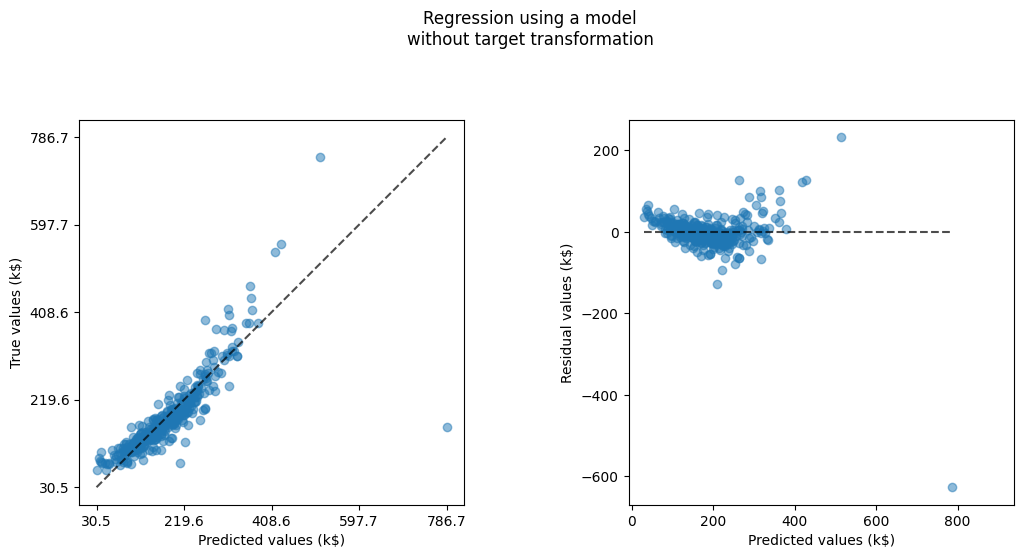

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

On these plots, we see that our model tends to under-estimate the price of the
house both for the lowest and large True price values. This means that the
residuals still hold some **structure typically visible as the "banana" or
"smile" shape of the residual plot**. This is often a clue that our model
could be improved, either by transforming the features, the target or
sometimes changing the model type or its parameters. In this case let's try to
see if the model would benefit from a target transformation that monotonically
reshapes the target variable to follow a normal distribution.

The aim of applying a TargetTransformer in regression analysis is to modify the target (dependent) variable to improve the model's performance and assumptions compliance. This transformation is primarily done to address issues such as non-linearity, non-constant variance (heteroscedasticity), and non-normal distribution of residuals. Here are some specific reasons and benefits for applying a transformation to the target variable in regression:

1. Stabilizing Variance

Transforming the target variable can help stabilize the variance of the residuals across different levels of predicted values, which is crucial for fulfilling the homoscedasticity assumption of linear regression. For example, applying a logarithmic transformation can reduce the effect of skewness and spread in data with a large range of values, like incomes or property prices, leading to more uniform variance.

2. Linearizing Relationships

Sometimes, the relationship between the independent and dependent variables may not be linear, which can hinder the model's ability to make accurate predictions. Transformations such as logarithmic, square root, or reciprocal can help linearize relationships, making them more suitable for linear modeling.

3. Improving Model Fit and Accuracy

By transforming the target variable to better meet the assumptions of linear regression, you can improve the overall fit of the model. This can lead to more accurate predictions, as the model can more effectively capture the underlying patterns in the data.

4. Dealing with Skewed Data

Highly skewed data can lead to issues in regression analysis, including bias in parameter estimation. Transformations help reduce skewness in the target variable, which can make the data more normally distributed and improve the robustness and reliability of the regression results.

5. Easing Interpretation

In cases where the scale of the target variable is cumbersome or not intuitive (e.g., exponential growth), transforming this variable can make the results easier to interpret and understand. For instance, converting a variable to a log-scale can change interpretation from absolute changes to relative (percent) changes.
Common Transformations

    Logarithmic Transformation (log(y)): Useful for data with exponential growth or multiplicative effects.
    Square Root Transformation (√y): Helpful with moderately skewed data.
    Reciprocal Transformation (1/y): Can be used when dealing with rate data.
    Box-Cox Transformation: A parametric transformation that identifies a suitable exponent (lambda λ) to stabilize variance and make the data normal.

When applying any transformation, it's crucial to consider how it will affect the interpretation of the model's outputs. For instance, after applying a log transformation, the effects of predictors are interpreted in terms of percentage changes rather than absolute changes. Moreover, after model fitting, predictions made on the transformed scale should be back-transformed to the original scale for interpretation and reporting.

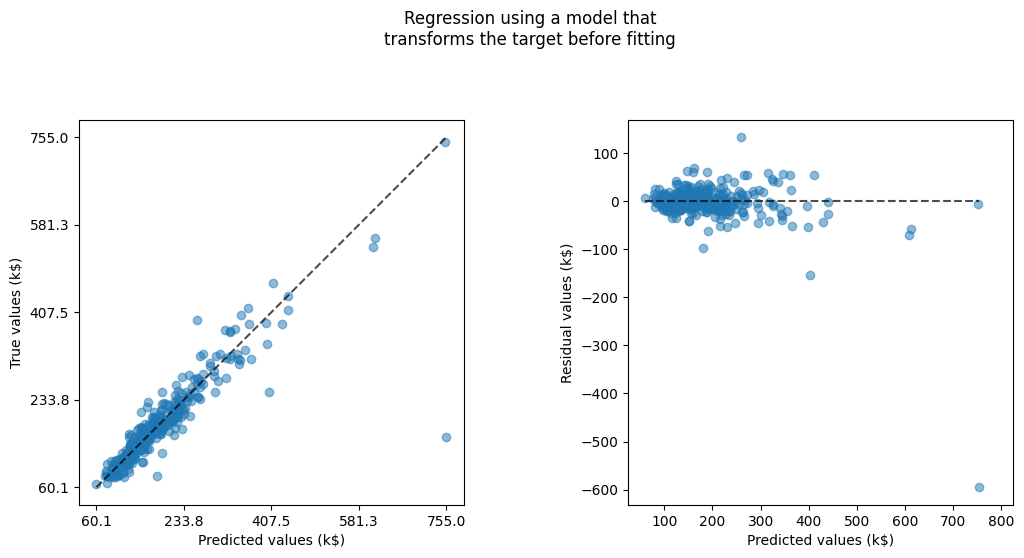

In [11]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = QuantileTransformer(
    n_quantiles=900, output_distribution="normal"
)
model_transformed_target = TransformedTargetRegressor(
    regressor=regressor, transformer=transformer
)
model_transformed_target.fit(data_train, target_train)
target_predicted = model_transformed_target.predict(data_test)

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

_ = fig.suptitle(
    "Regression using a model that\ntransforms the target before fitting",
    y=1.1,
)

# In general, the scoring parameter passed to scikit-learn model selection utilities expects the convention that "higher is better"

The model with the transformed target seems to exhibit fewer structure in its
residuals: over-estimation and under-estimation errors seems to be more
balanced.

We can confirm this by computing the previously mentioned metrics and observe
that they all improved w.r.t. the linear regression model without the target
transformation.

In [12]:
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted):.2%}"
)

Mean absolute error: 17.406 k$
Median absolute error: 10.327 k$
Mean absolute percentage error: 9.92%


While a common practice, performing such a target transformation for linear
regression is often disapproved by statisticians. It is mathematically more
justified to instead adapt the loss function of the regression model itself,
for instance by fitting a
[`PoissonRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)
or a
[`TweedieRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)
model instead of `LinearRegression`. In particular those models indeed use an
internal "log link" function that makes them more suited for this kind of
positive-only target data distributions, but this analysis is beyond the scope
of this MOOC.

The interested readers are encouraged to learn more about those models, in
particular by reading their respective docstrings and the linked sections
in the scikit-learn user guide reachable from the links above.